In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring Matplotlib: Using Seaborn to Teach us how to build practical matplotlib functions

Matplotlib's Figures are made up of nested parts:

  - **Figure**: The whole window  (`plt.Figure()` or `plt.figure()`)
    - **Super Title**: The figure's title (`Figure.suptitle()`)
    - **Size**: The figure's width and height ('Figure(figsize=(8, 5))` or `Figure.set_figwidth()` or `Figure.set_figheight()`)
    - **Resolution in Dots per Inch**: The figure's print resolution (`Figure(dpi=200)`)
    - **Axes**: The subplots in the window.  (`Figure.add_axes([left, bottom, widght, height])` or `Figure.add_subplot(rows, cols, index)`
      - **Title**: Title (`Axes.set_title()`)
      - **X Limits**: The range of data shown in the x axis (`Axes.set_xlim()`)
      - **Y Limits**: The range of data shown in the y axis (`Axes.set_ylim()`)
      - **Legend**: A legend (`Axes.legend()`)
      - **Artist Data**: When plots are added, various containers of lines, patches, markers, text, etc are added to the Axes, depending on the type of plot.  The best way to access this data is to get the output of the original plotting function.
      - **Plot Methods**: Commands to plot some data! This list is best found at https://matplotlib.org/stable/api/axes_api.html#plotting
      
In this notebook, we'll examine how Seaborn organizes its functions, with the goal of replicating its functions in order to build custom matplotlib figures ourselves.

![](https://matplotlib.org/2.0.2/_images/anatomy1.png)

## Load Penguins Dataset

For this set of exercises, we'll be working with seaborn's `penguins` dataset, supplied as a `pandas.DataFrame` object.  

**Note**: If this is your first time working with an Pandas DataFrame, no worries!  All you need to know to work with this notebook is:
  - `DataFrame.head()`: returns a preview of the first 5 rows of the dataset
  - `DataFrame.columns`: returns a list of the names of the columns in the dataset
  - `df['column_name']`: returns the data from the column as a Pandas Series
  - `df['column_name'].values`: returns the data from the column as a Numpy Array
  - `DataFrame.info()`: returns a summary of information about each column

In [5]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Dividing Plotting Functions into "Figure-Level" and "Axis-Level" Units

Like Matplotlib, Seaborn has two main kinds of functions:  

  - **Figure-Level** Functions (makes a `Figure` and all the `Axes` inside it) 
  - **Axes-Level** Functions (makes an `Axes`)
  
Figure-level functions are useful if you want Seaborn to make subplots; they tell Seaborn which Axes-level function to call under the hood.  If you want to manage subplots seperately, then Axes-level functions may be a better way to go. 

If you look on Seaborn's documentation, you'll see that within each type of plot, there is one Figure-level function that can call one of several Axes-level functions: https://seaborn.pydata.org/api.html

### Figure-Level Functions: `relplot()`, `displot()`, and `catplot()`

Seaborn's plotting functions have a consistent syntax:

`plot_fun(data=pd.DataFrame, **property:column_name)`, with `property` being any of several properties of a graph:

  - `x`: the column plotted on the x axis
  - `y`: the column plotted on the y axis
  - `hue`: the column whose values are represented by the **color** of the data plotted
  - `style`: if markers are used, the column whose values are represented by the style of the marker
  - `row`: the column whose values determine which subplot row the data is plotted
  - `col`: the column whose values determine which subplot column the data is plotted
  
For example: `sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm)`

**Important**: Which plot function you use depends on whether the variables are continuous or categorical, and whether you want to emphasize their means or their distributions.

**Exercises**

Using only Figure-level plotting functions, answer the following questions:

Does the length of the bill differ between penguin species?

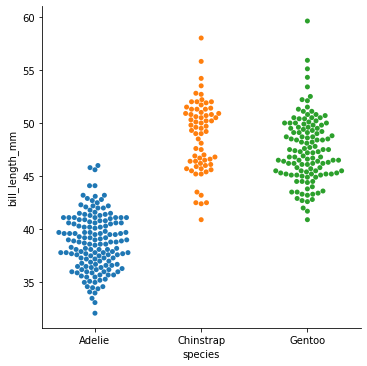

In [14]:
sns.catplot(data=df, x='species', y='bill_length_mm', kind='swarm');

Does the length of the bill differ between penguin sexes?

(0.0, 48.0)

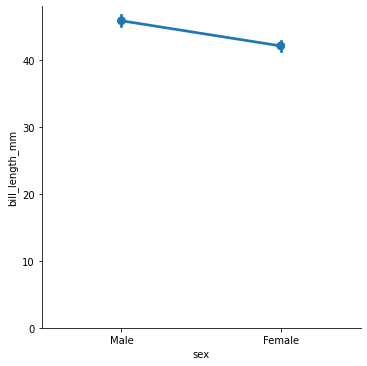

In [29]:
sns.catplot(data=df, x='sex', y='bill_length_mm', kind='point');
ax = plt.gca()
ax.set_ylim(0, 48)

Does the overall shape of the bill (length and depth, together) differ between penguin species?

Text(0.5, 1.0, 'CHINSTRAP')

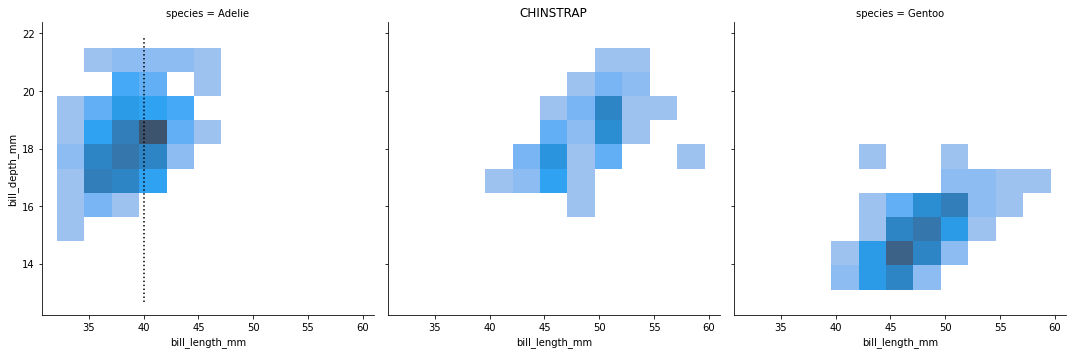

In [54]:
grid = sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', col='species', kind='hist');
fig = grid.fig
ax1 = fig.axes[0]
ax1.vlines(40, ax1.get_ylim()[0], ax1.get_ylim()[1], color='black', linestyle='dotted')
fig.axes[1].set_title('CHINSTRAP')

Does the flipper length vary with body mass?

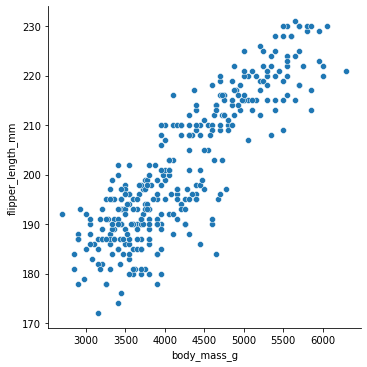

In [61]:
sns.relplot(data=df, x='body_mass_g', y='flipper_length_mm', kind='scatter');

In [62]:
import numpy as np

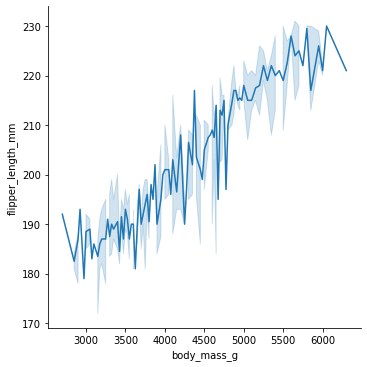

In [64]:
sns.relplot(data=df, x='body_mass_g', y='flipper_length_mm', kind='line', estimator=np.median);

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

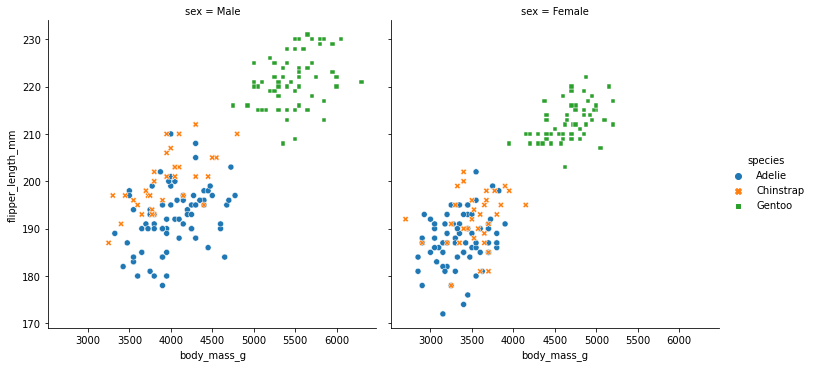

In [72]:
sns.relplot(data=df, x='body_mass_g', y='flipper_length_mm', kind='scatter', col='sex', hue='species', style='species');

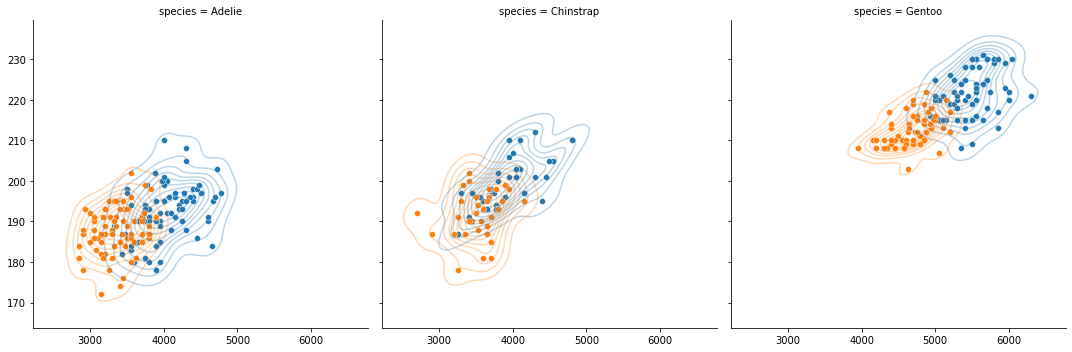

In [82]:
g = sns.FacetGrid(data=df, col='species', hue='sex', height=5)
g.map_dataframe(sns.scatterplot, data=df, x='body_mass_g', y='flipper_length_mm');
g.map_dataframe(sns.kdeplot, data=df, x='body_mass_g', y='flipper_length_mm', alpha=.3);

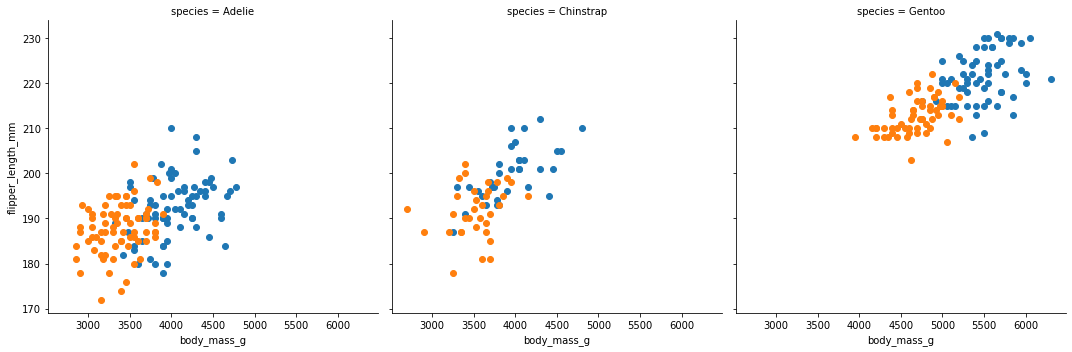

In [83]:
g = sns.FacetGrid(data=df, col='species', hue='sex', height=5)
g.map_dataframe(plt.scatter, 'body_mass_g', 'flipper_length_mm');

## Replicate Figures, only Using Seaborn's Axis-Level Plotting Functions and Using Matplotlib to manage the subplots

Make sure that:
  - Each subplot has a title
  - The axes on each subplot are aligned
  - The colors on each subplot represent the same thing

**Exercises**

Using only Figure-level plotting functions, answer the following questions:

Does the length of the bill differ between penguin species?

Does the length of the bill differ between penguin sexes?

Does the overall shape of the bill (length and depth, together) differ between penguin species?

Does the flipper length vary with body mass?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

## Replicate Figures, only Using Matplotlib's Plotting Functions and Using Matplotlib to manage the subplots

Matplotlib doesn't automatically translate Pandas dataframes, and its plot functions are often a bit different from each other in interface, but that doesn't need to stop us!

Use these docs for a helpful reference to Axes-level plotting functions: https://matplotlib.org/stable/api/axes_api.html#plotting

As before, make sure that:
  - Each subplot has a title
  - The axes on each subplot are aligned
  - The colors on each subplot represent the same thing

**Exercises**

Using only Figure-level plotting functions, answer the following questions:

Does the length of the bill differ between penguin species?

Does the length of the bill differ between penguin sexes?

Does the overall shape of the bill (length and depth, together) differ between penguin species?

Does the flipper length vary with body mass?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?